## Generating the Hamiltonian

The file moirev5.py is responsible for generating the tight binding terms of the lattice model.

In [2]:
from moirev5 import *

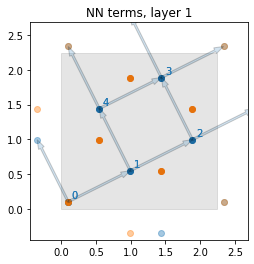

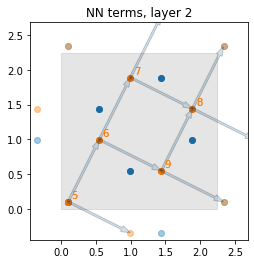

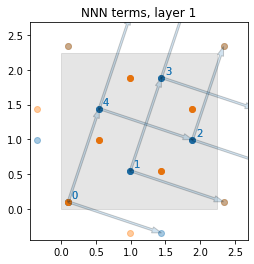

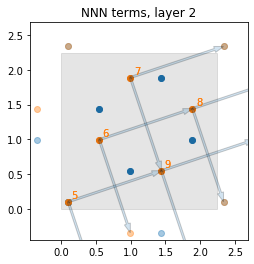

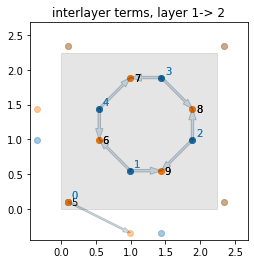

In [10]:
hops1,hops2,hops12,hops11,hops22 = generate(a=1.0,d=2.22,vec=[1,2],interlayerNNnumber=2,interlayerNNdistance=7.8,offsetamount=0,plothoppingmaps=True,rho=0.39,nx=1,ny=1)


We can compare these visuals to the hopping lists. Consider the interlayer terms "hops12" corresponding to the last diagram above. (note that we omit a large number of interlayer neighbors for clarity in this tutorial.)

In [4]:
hops12

[[0, 5, 1.0, [0, 0], [1, 2]],
 [0, 7, 0.5764609570867281, [0, -1], [1, 2]],
 [1, 9, 0.8919443608088381, [0, 0], [1, 2]],
 [1, 6, 0.797323979763643, [0, 0], [1, 2]],
 [4, 6, 0.8919443608088381, [0, 0], [1, 2]],
 [4, 7, 0.797323979763643, [0, 0], [1, 2]],
 [2, 8, 0.8919443608088381, [0, 0], [1, 2]],
 [2, 9, 0.797323979763643, [0, 0], [1, 2]],
 [3, 7, 0.8919443608088381, [0, 0], [1, 2]],
 [3, 8, 0.797323979763643, [0, 0], [1, 2]]]

each element in the list corresponds to a hopping term. Entries for each element are 
$$[\text{annihilation site, creation site, exponential reduction factor, k dependent factor}, [\text{layer indices}]]$$ where the exponential reduction factor is an assumption of the model that the strength of the interlayer coupling terms have the form $e^{-r/r_0}$. k-dependent factor keeps track of the hoppings that leave the unit cell, introducing a $e^{-ik.G}$ factor for the hoppings terms in k-space. Also note that in the visual above, (only for interlayer hoppings) the thickness of the arrow, in arbitrary units, correspond to strength of the coupling.

## Superconducting Order Parameters

To account for d-wave superconductivity in each layer, we use the simplest possible description with next nearest neighbor attractive Hubbard potential. Take a look at the first figure above with title "NN terms, layer 1". Each of the arrows not only represent the tight binding hopping term but also are associated with a pairing between the sites that it connects. Let us look at the corresponding terms:

In [8]:
hops1

[[0, 1, '+x', [0, 0], [1, 1]],
 [0, 2, '+y', [-1, 0], [1, 1]],
 [3, 1, '+y', [0, 1], [1, 1]],
 [1, 4, '+y', [0, 0], [1, 1]],
 [3, 0, '+x', [1, 1], [1, 1]],
 [1, 2, '+x', [0, 0], [1, 1]],
 [4, 3, '+x', [0, 0], [1, 1]],
 [2, 3, '+y', [0, 0], [1, 1]],
 [4, 0, '+y', [0, 1], [1, 1]],
 [2, 4, '+x', [1, 0], [1, 1]]]

We define a separate order parameter without any constraints for each nearest neighbor pair $\{i,j\}$ (corresponding to first two columns) $\Delta_{ij,a}$ where $a=1$ is the layer index. Note that the directionality of each bond is labeled in the third column. With this definition, as shown in the paper, the gap equation is given by

$$\Delta_{ij,a}  = -\frac{V}{N}\sum_{\textbf{k}}\text{tr}\left[ \frac{\partial h_\textbf{k}}{\partial \Delta_{ij,a}^\ast}  P_\textbf{k} n_F(E_\textbf{k})P_\textbf{k}^\dagger \right]$$ where $P_\textbf{k}$ is a unitary matrix that diagonalizes the
Hamiltonian as $ P_\textbf{k}^\dagger h_\textbf{k} P_\textbf{k} = E_\textbf{k}$ and $n_F(E_\textbf{k})$ is a
diagonal matrix where Fermi function is applied to the eigenvalues $E_\textbf{k}$.

In [solver.py](https://github.com/ocanphys/tbcuprate/blob/master/solver.py) we start the self consistent solution procedure with the d-wave ansatz for each layer (d-wave superconductivity corresponds to $\Delta_x = -\Delta_y$). At each step, given the order parameters, we compute eigenvectors and eigenvalues of the Hamiltonian to compute the RHS of the above equation which gives us new values for the order parameters defined on each bond. We then mix these values with the previous values which went into RHS to improve convergence and keep iterating the procedure until convergence is achieved.

More details can be found in the comments and documentation of [solver.py](https://github.com/ocanphys/tbcuprate/blob/master/solver.py)

## More on different twist angles and interlayer terms

We are also able to tune the twist angles as long as the twist is such that we get a commensurate Moire unit cell. Consider, for instance vec=[3,8] with a larger number of interlayer neighbors per site

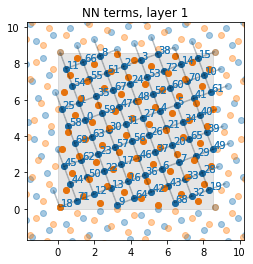

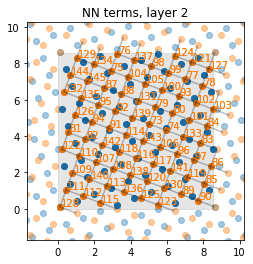

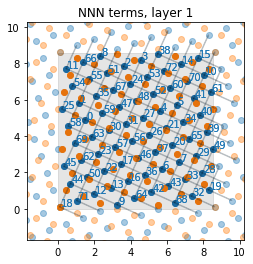

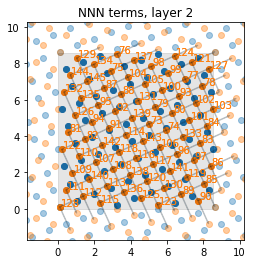

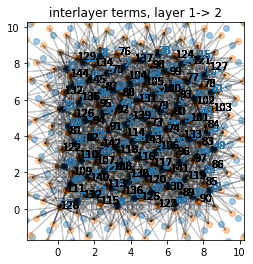

In [13]:
hops1,hops2,hops12,hops11,hops22 = generate(a=1.0,d=2.22,vec=[3,8],interlayerNNnumber=30,interlayerNNdistance=7.8,offsetamount=0,plothoppingmaps=True,rho=0.39,nx=1,ny=1)
